In [1]:
# SPEC_MMAX.IPYNB -- calculate distribution over maximum masses of spectral EOSs from GW170817 analysis

In [2]:
import numpy as np # import packages
import lal 
import lalsimulation as lalsim

outfile = open("mmax_spec.csv","w") # record maximum masses by spectral EOS number
outfile.write("EOS,Mmax \n")

In [3]:
spec_param_dat = np.genfromtxt("170817_posterior_samples_spectral.dat",names=True) # load 170817 spectral EOS data, taken from 4S-1 @ https://git.ligo.org/publications/gw170817/bns-eos/-/wikis/reviews#runs
spec_param_names = ['sdgamma0','sdgamma1','sdgamma2','sdgamma3']

gamma = [] # load samples of spectral EOS parameters
for i in range(4): 
    name = spec_param_names[i]
    gamma.append(spec_param_dat[name])

In [4]:
num_eos = len(gamma[0]) # for each sample of parameters, reconstruct EOS and return maximum mass
mmax_dat = []
for i in range(num_eos): # lalsim calls copied from https://git.ligo.org/publications/gw190425/gw190425-discovery/blob/master/scripts/supplementary_material/lambdaT_supplementary.ipynb
    eos = lalsim.SimNeutronStarEOS4ParameterSpectralDecomposition(gamma[0][i],gamma[1][i],gamma[2][i],gamma[3][i])
    fam = lalsim.CreateSimNeutronStarFamily(eos)
    mmax = lalsim.SimNeutronStarMaximumMass(fam)/lal.MSUN_SI
    mmax_dat.append(mmax)
    outfile.write("{0},{1} \n".format(i,mmax))
outfile.close()

In [5]:
import matplotlib # make a plot of maximum mass distribution
from matplotlib import pyplot as plt
#import seaborn as sns

#cp = sns.color_palette('colorblind', 6)
matplotlib.rcParams['figure.figsize'] = (9.7082039325, 6.0)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 25.0
matplotlib.rcParams['legend.fontsize'] = 17.0
matplotlib.rcParams['font.family']= 'Times New Roman'
matplotlib.rcParams['font.sans-serif']= ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['mathtext.fontset']= 'stixsans'

/cvmfs/ligo-containers.opensciencegrid.org/lscsoft/conda/latest/envs/ligo-py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


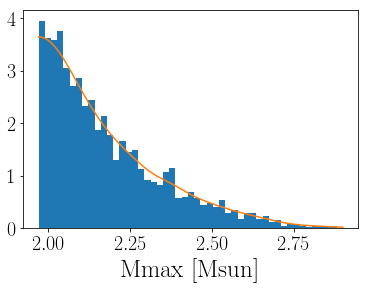

2.431194040588154


In [6]:
from scipy.stats import gaussian_kde
mmax_dat_reflect = [1.97-(pt-1.97) for pt in mmax_dat]
kde = gaussian_kde(np.append(mmax_dat,mmax_dat_reflect))

plt.hist(mmax_dat,bins=int(np.sqrt(num_eos)),density=True,histtype='stepfilled') # histogram of Mmax
plt.plot(np.linspace(1.97,2.9,100),2*kde(np.linspace(1.97,2.9,100)))

plt.xlabel('Mmax [Msun]')
plt.show()

print np.percentile(mmax_dat,90) # one-sided 90%-credible upper bound